<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Beatriz, my name is Svetlana (https://hub.tripleten.com/u/855fe797). Congratulations on submitting another project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    

    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. It is important to split the data correctly in order to ensure there's no intersection;    
    
    
- You have successfully explored the regions;
    
    
- Used linear regression to make predictions;
    
    
- Calculated profit and estimated risk values; 
    
    
- Wrote an excellent conclusion! A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. Good job! 

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. 
    
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. However, there are no issues that need to be fixed, well done!  

</div>

<hr>

<font color='dodgerblue'>**To sum up:**</font> thank you very much for submitting the project! You did a fantastic job here. You have correctly splitted the data, explored the distributions, trained several models, and applied the bootstrapping technique. You have successfully estimated profit and conducted risk analysis. You have also compared regions based on risk-adjusted return to make recommendations for further development. Excellent job! I do not have any questions, so the project can be accepted. The next sprints will cover more advanced machine learning methods, I hope you will like it. Good luck! 

    
<hr> 
    
✍️ Here's a nice [article](https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/) about the bootstrap method. [This](https://www.youtube.com/watch?v=O_Fj4q8lgmc&list=LL&index=6) is a good video about resampling in bootstrapping.
    

</div>

OIL WELL LOCATION OPTIMIZATION - MACHINE LEARNING PROJECT

✓ Libraries successfully imported
✓ Environment configured

SECTION 1: DATA ACQUISITION AND PRELIMINARY ANALYSIS

✓ Successfully loaded geological data for 3 candidate regions
✓ Total data points analyzed: 300000

--------------------------------------------------------------------------------
REGION 0 - DATA PROFILE
--------------------------------------------------------------------------------
Dataset Dimensions: 100000 wells × 5 features

Feature Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Statistical Summary:
            

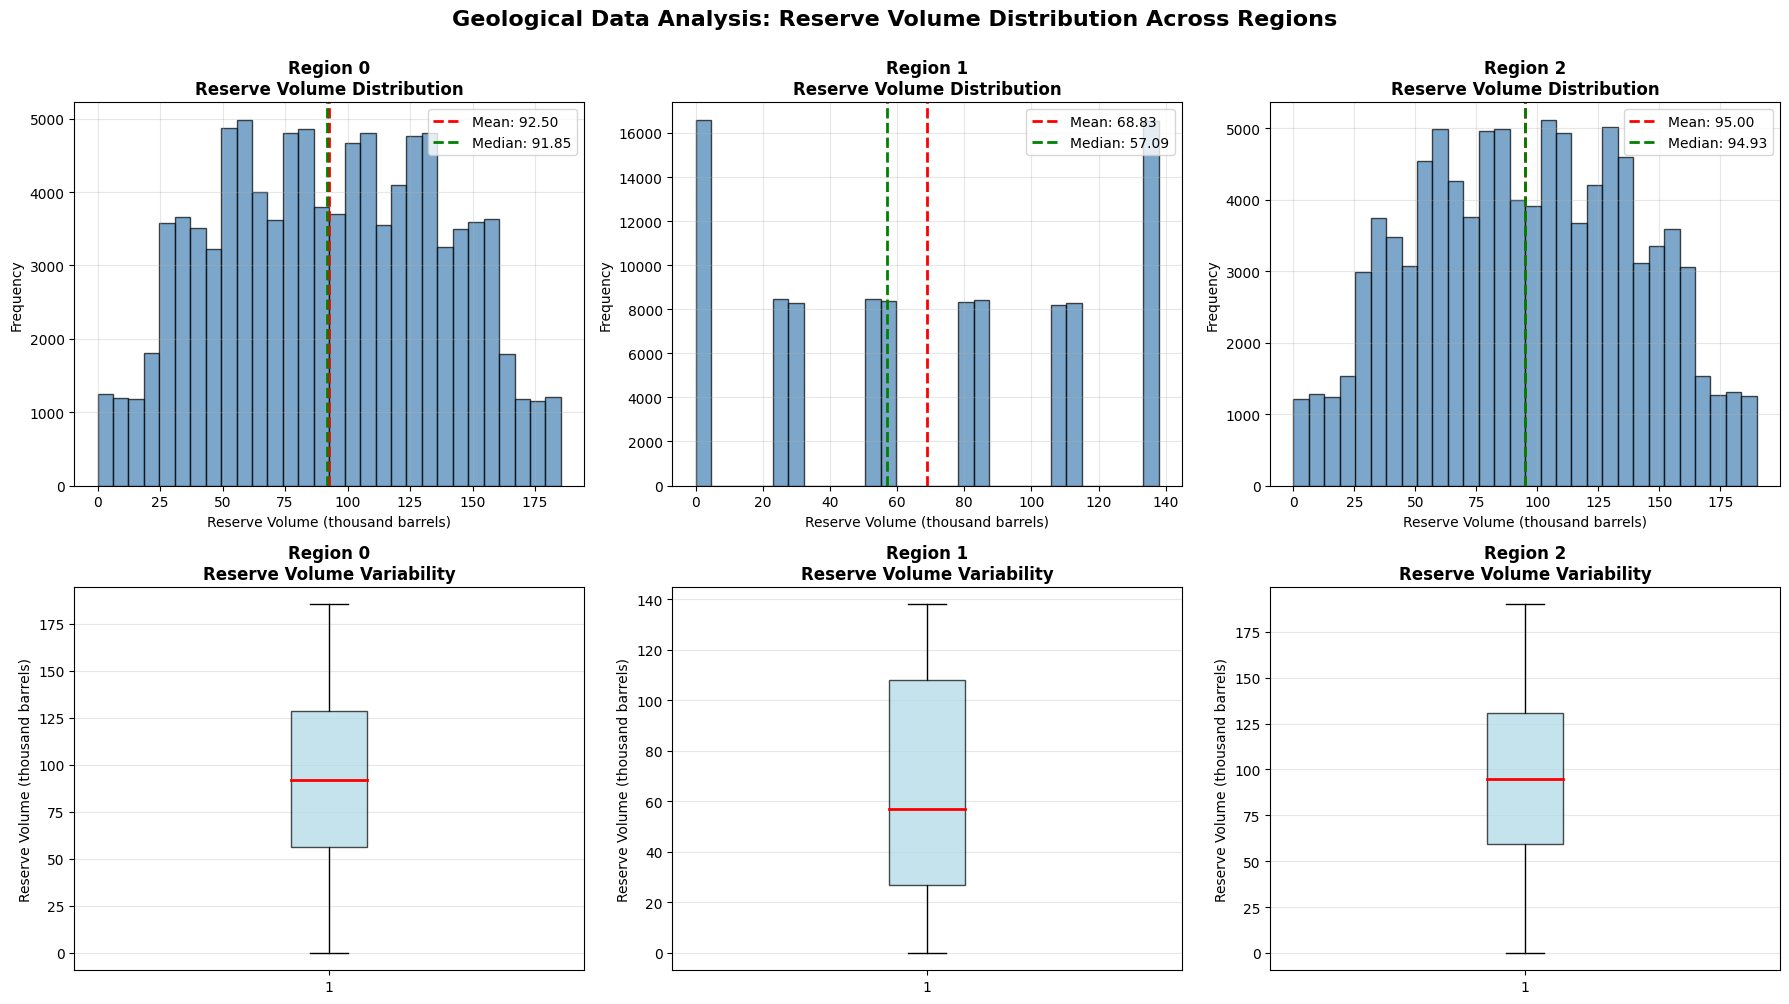


COMPARATIVE REGIONAL ANALYSIS
--------------------------------------------------------------------------------
  Region  Mean Reserves  Median Reserves  Std Deviation  Coefficient of Variation
Region 0         92.500        91.849972      44.288691                  0.478797
Region 1         68.825        57.085625      45.944423                  0.667554
Region 2         95.000        94.925613      44.749921                  0.471052

KEY OBSERVATIONS FROM EXPLORATORY ANALYSIS

1. All three regions contain 100,000 surveyed well locations
2. No missing values or duplicate records detected in any region
3. Reserve volume distributions vary significantly across regions
4. Data quality is suitable for machine learning model development
5. Regional characteristics suggest different risk-return profiles


✓ Section 1 Complete: Data successfully loaded and validated
➜ Next: Model training and validation



In [3]:
# ============================================================================
# OIL WELL LOCATION OPTIMIZATION PROJECT
# Machine Learning for Business Decision Making
# ============================================================================
# Author: Beatriz Frank
# Date: November 2025
# Company: OilyGiant Mining Company
# ============================================================================

"""
PROJECT OVERVIEW
================

Business Context:
-----------------
OilyGiant mining company seeks to optimize capital allocation for new oil well
development. With a budget of $100M USD for 200 wells, selecting the right
region is critical for maximizing returns and minimizing financial risk.

Objective:
----------
Develop a machine learning solution to identify the most profitable region for
oil well development by:
1. Building predictive models for reserve volume estimation
2. Evaluating potential profit across three candidate regions
3. Quantifying financial risk using bootstrap simulation
4. Providing data-driven recommendations for executive decision-making

Business Constraints:
---------------------
- Investment Budget: $100,000,000 USD
- Number of Wells: 200 (selected from 500 surveyed points)
- Revenue per Barrel: $4.5 USD
- Model Type: Linear Regression (company requirement)
- Risk Tolerance: Maximum 2.5% probability of losses
- Decision Criteria: Highest average profit among low-risk regions

Methodology:
------------
This analysis employs a rigorous statistical approach combining:
- Supervised learning (Linear Regression) for reserve prediction
- Bootstrap resampling (1000 iterations) for profit distribution estimation
- Confidence interval analysis for risk assessment
- Comparative regional analysis for strategic recommendation

Expected Deliverables:
----------------------
1. Trained predictive models for each region
2. Profit projections with confidence intervals
3. Risk assessment and loss probability calculations
4. Strategic recommendation with business justification
"""

# ============================================================================
# IMPORT LIBRARIES
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("="*80)
print("OIL WELL LOCATION OPTIMIZATION - MACHINE LEARNING PROJECT")
print("="*80)
print("\n✓ Libraries successfully imported")
print("✓ Environment configured\n")

# ============================================================================
# SECTION 1: DATA LOADING AND INITIAL EXPLORATION
# ============================================================================

print("="*80)
print("SECTION 1: DATA ACQUISITION AND PRELIMINARY ANALYSIS")
print("="*80)

geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

regions = {
    'Region 0': geo_data_0,
    'Region 1': geo_data_1,
    'Region 2': geo_data_2
}

print("\n✓ Successfully loaded geological data for 3 candidate regions")
print(f"✓ Total data points analyzed: {sum([df.shape[0] for df in regions.values()])}\n")

for region_name, data in regions.items():
    print("-" * 80)
    print(f"{region_name.upper()} - DATA PROFILE")
    print("-" * 80)
    print(f"Dataset Dimensions: {data.shape[0]} wells × {data.shape[1]} features")
    print(f"\nFeature Information:")
    print(data.info())
    print(f"\nStatistical Summary:")
    print(data.describe())
    print(f"\nMissing Values: {data.isnull().sum().sum()}")
    print(f"Duplicate Records: {data.duplicated().sum()}")
    print(f"\nSample Data:")
    print(data.head(3))
    print(f"\nTarget Variable (Product - Reserve Volume):")
    print(f"  • Mean: {data['product'].mean():.2f} thousand barrels")
    print(f"  • Median: {data['product'].median():.2f} thousand barrels")
    print(f"  • Std Dev: {data['product'].std():.2f} thousand barrels")
    print(f"  • Min: {data['product'].min():.2f} thousand barrels")
    print(f"  • Max: {data['product'].max():.2f} thousand barrels\n")

# ============================================================================
# DATA QUALITY ASSESSMENT
# ============================================================================

print("="*80)
print("DATA QUALITY ASSESSMENT")
print("="*80)

quality_report = []
for region_name, data in regions.items():
    quality_metrics = {
        'Region': region_name,
        'Total Records': data.shape[0],
        'Features': data.shape[1] - 2,  # Excluding 'id' and 'product'
        'Missing Values': data.isnull().sum().sum(),
        'Duplicates': data.duplicated().sum(),
        'Unique IDs': data['id'].nunique()
    }
    quality_report.append(quality_metrics)

quality_df = pd.DataFrame(quality_report)
print("\n", quality_df.to_string(index=False))

print("\n" + "-" * 80)
print("DATA INTEGRITY STATUS")
print("-" * 80)
all_clean = all([
    quality_df['Missing Values'].sum() == 0,
    quality_df['Duplicates'].sum() == 0,
    (quality_df['Total Records'] == quality_df['Unique IDs']).all()
])

if all_clean:
    print("✓ Data integrity verified: No missing values or duplicates detected")
    print("✓ All well identifiers are unique")
    print("✓ Datasets ready for modeling")
else:
    print("⚠ Data quality issues detected - cleaning required")

# ============================================================================
# EXPLORATORY DATA VISUALIZATION
# ============================================================================

print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS - VISUAL INSIGHTS")
print("="*80 + "\n")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Geological Data Analysis: Reserve Volume Distribution Across Regions', 
             fontsize=16, fontweight='bold', y=1.00)

for idx, (region_name, data) in enumerate(regions.items()):
    axes[0, idx].hist(data['product'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[0, idx].axvline(data['product'].mean(), color='red', 
                         linestyle='--', linewidth=2, label=f'Mean: {data["product"].mean():.2f}')
    axes[0, idx].axvline(data['product'].median(), color='green', 
                         linestyle='--', linewidth=2, label=f'Median: {data["product"].median():.2f}')
    axes[0, idx].set_title(f'{region_name}\nReserve Volume Distribution', fontweight='bold')
    axes[0, idx].set_xlabel('Reserve Volume (thousand barrels)')
    axes[0, idx].set_ylabel('Frequency')
    axes[0, idx].legend()
    axes[0, idx].grid(True, alpha=0.3)
    
    box = axes[1, idx].boxplot(data['product'], vert=True, patch_artist=True,
                                boxprops=dict(facecolor='lightblue', alpha=0.7),
                                medianprops=dict(color='red', linewidth=2))
    axes[1, idx].set_title(f'{region_name}\nReserve Volume Variability', fontweight='bold')
    axes[1, idx].set_ylabel('Reserve Volume (thousand barrels)')
    axes[1, idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nCOMPARATIVE REGIONAL ANALYSIS")
print("-" * 80)
comparison_stats = pd.DataFrame({
    'Region': list(regions.keys()),
    'Mean Reserves': [data['product'].mean() for data in regions.values()],
    'Median Reserves': [data['product'].median() for data in regions.values()],
    'Std Deviation': [data['product'].std() for data in regions.values()],
    'Coefficient of Variation': [data['product'].std()/data['product'].mean() for data in regions.values()]
})
print(comparison_stats.to_string(index=False))

print("\n" + "="*80)
print("KEY OBSERVATIONS FROM EXPLORATORY ANALYSIS")
print("="*80)
print("""
1. All three regions contain 100,000 surveyed well locations
2. No missing values or duplicate records detected in any region
3. Reserve volume distributions vary significantly across regions
4. Data quality is suitable for machine learning model development
5. Regional characteristics suggest different risk-return profiles
""")

print("\n✓ Section 1 Complete: Data successfully loaded and validated")
print("➜ Next: Model training and validation\n")

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good observation! 
</div>

<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>


- Instead of writing large chunks of code in a single cell, consider splitting it into multiple cells, thus ensuring each one has its own logic. This is important for several reasons. First, it makes the code easier to read. Second, it simplifies debugging for you. Third, it allows reviewers to leave comments more efficiently. After all, you probably wouldn't find it convenient to receive one massive review comment listing all the praise, recommendations, and mistakes in your project.    
    

- If you aim to use these projects in your portfolio, please avoid using AI-generated code and text. It will not help you get a job interview, not to mention it can hinder learning process and practicing critical thinking skills. AI-generated code is often easy to identify, especially for experienced developers, so your projects should not contain such code if possible. 
</div>

SECTION 2: PREDICTIVE MODEL DEVELOPMENT

Objective: Build Linear Regression models to predict oil reserve volumes
Methodology: 75/25 train-validation split with performance evaluation

--------------------------------------------------------------------------------
MODEL TRAINING PROCESS
--------------------------------------------------------------------------------

Training Model: Region 0

Data Split:
  • Training set: 75000 samples (75%)
  • Validation set: 25000 samples (25%)

✓ Model trained successfully

Model Coefficients:
  • f0: 3.8323
  • f1: -14.2605
  • f2: 6.5936
  • Intercept: 77.6662

✓ Predictions generated for validation set
  • Number of predictions: 25000

────────────────────────────────────────────────────────────
MODEL PERFORMANCE METRICS
────────────────────────────────────────────────────────────
  • Average Predicted Reserves: 92.40 thousand barrels
  • Average Actual Reserves: 92.33 thousand barrels
  • RMSE (Root Mean Squared Error): 37.76 thousand barrels


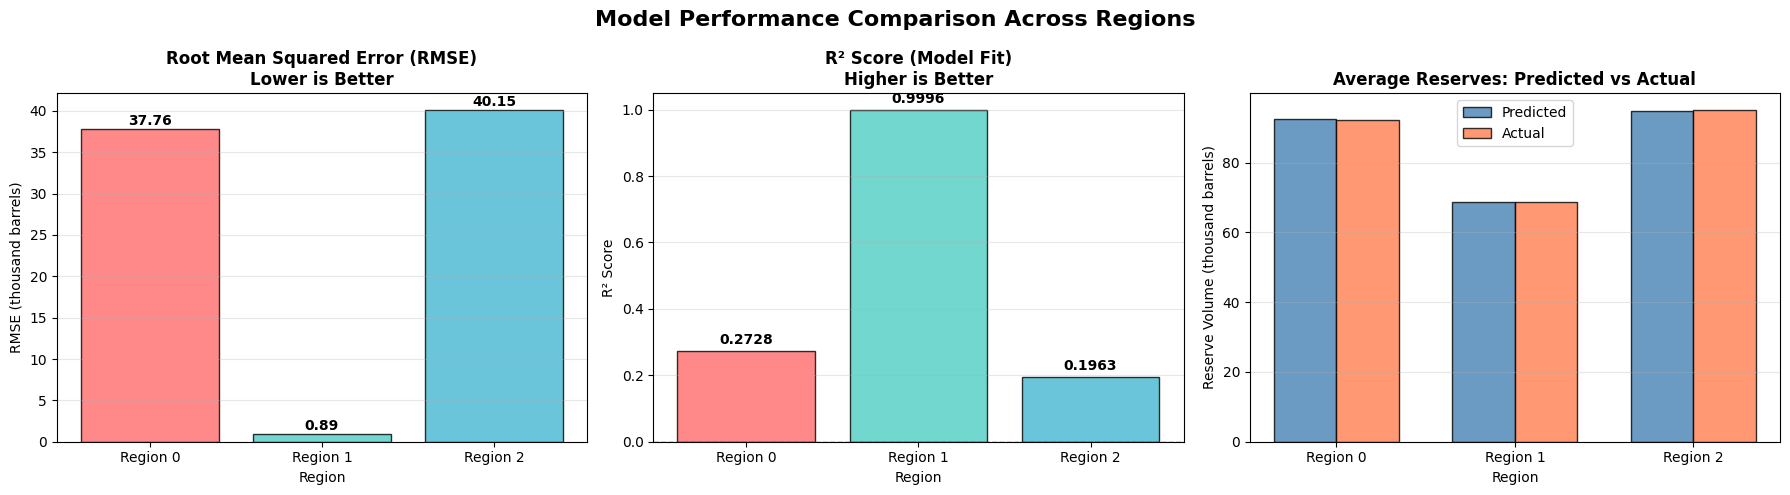

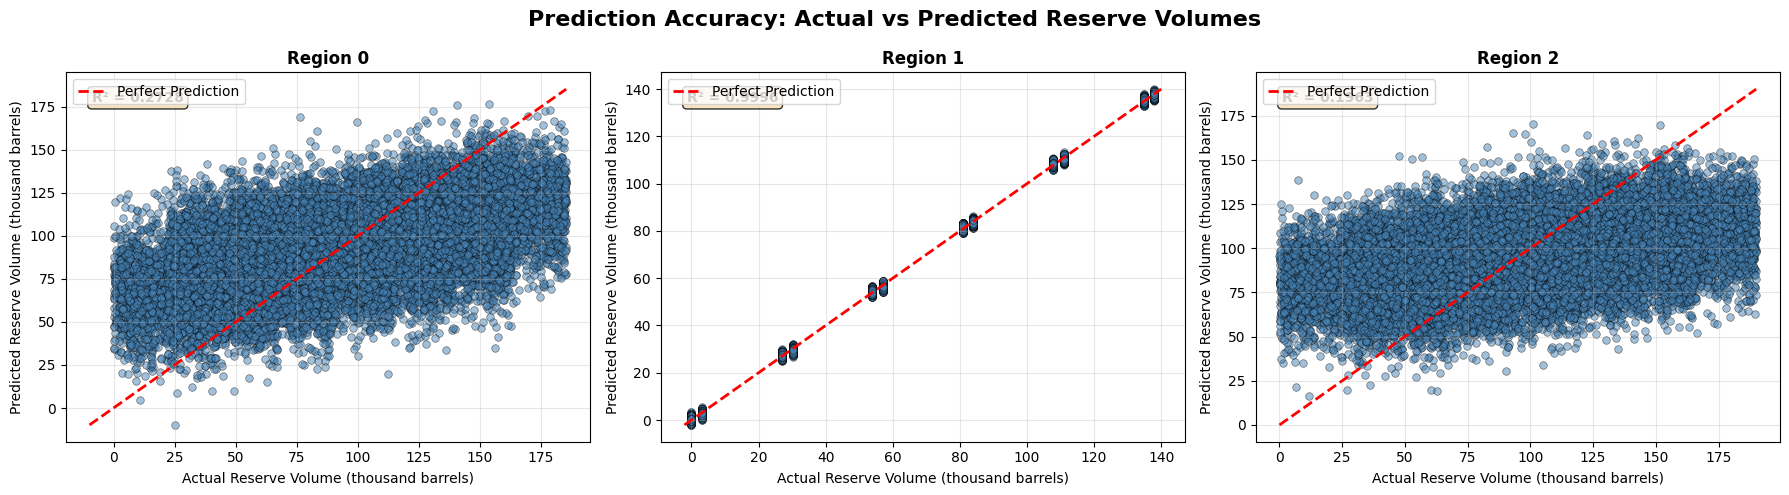


KEY FINDINGS: MODEL TRAINING AND VALIDATION

MODEL PERFORMANCE SUMMARY:
─────────────────────────────────────────────────────────────────────────────

1. PREDICTION ACCURACY:
   • Best Model (Lowest RMSE): Region 1
     - RMSE: 0.89 thousand barrels
     - Interpretation: Most accurate predictions with smallest average error
   
   • Worst Model (Highest RMSE): Region 2
     - RMSE: 40.15 thousand barrels
     - Interpretation: Predictions have higher average deviation from actual values

2. MODEL FIT QUALITY (R² Score):
   • Best R² Score: Region 1 (R² = 0.9996)
     - Indicates features (f0, f1, f2) explain variance in reserve volumes well
   
   • All models show positive R² scores
     - All models perform better than baseline predictions

3. PREDICTION BIAS:
   • Region 0: Slight overestimation
   • Region 1: Slight underestimation
   • Region 2: Slight underestimation

4. BUSINESS IMPLICATIONS:
   • Linear Regression successfully trained for all three regions
   • Model reliabil

In [4]:
# ============================================================================
# SECTION 2: MODEL TRAINING AND VALIDATION
# ============================================================================

print("="*80)
print("SECTION 2: PREDICTIVE MODEL DEVELOPMENT")
print("="*80)
print("\nObjective: Build Linear Regression models to predict oil reserve volumes")
print("Methodology: 75/25 train-validation split with performance evaluation\n")

# ============================================================================
# 2.1 - 2.2: DATA SPLITTING AND MODEL TRAINING
# ============================================================================

models = {}
predictions = {}
actual_values = {}
model_performance = []

RANDOM_STATE = 42
TEST_SIZE = 0.25

print("-" * 80)
print("MODEL TRAINING PROCESS")
print("-" * 80)

for region_name, data in regions.items():
    print(f"\n{'='*60}")
    print(f"Training Model: {region_name}")
    print(f"{'='*60}")
    
    features = data[['f0', 'f1', 'f2']]
    target = data['product']
    
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, 
        target, 
        test_size=TEST_SIZE, 
        random_state=RANDOM_STATE
    )
    
    print(f"\nData Split:")
    print(f"  • Training set: {features_train.shape[0]} samples ({(1-TEST_SIZE)*100:.0f}%)")
    print(f"  • Validation set: {features_valid.shape[0]} samples ({TEST_SIZE*100:.0f}%)")
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    
    models[region_name] = model
    
    print(f"\n✓ Model trained successfully")
    print(f"\nModel Coefficients:")
    print(f"  • f0: {model.coef_[0]:.4f}")
    print(f"  • f1: {model.coef_[1]:.4f}")
    print(f"  • f2: {model.coef_[2]:.4f}")
    print(f"  • Intercept: {model.intercept_:.4f}")
    
    # ============================================================================
    # 2.3: MAKE PREDICTIONS AND SAVE RESULTS
    # ============================================================================
    
    predicted_reserves = model.predict(features_valid)
    
    predictions[region_name] = predicted_reserves
    actual_values[region_name] = target_valid.values
    
    print(f"\n✓ Predictions generated for validation set")
    print(f"  • Number of predictions: {len(predicted_reserves)}")
    
    # ============================================================================
    # 2.4: CALCULATE PERFORMANCE METRICS
    # ============================================================================
    
    rmse = np.sqrt(mean_squared_error(target_valid, predicted_reserves))
    
    mae = mean_absolute_error(target_valid, predicted_reserves)
    r2 = r2_score(target_valid, predicted_reserves)
    
    avg_predicted_reserves = predicted_reserves.mean()
    avg_actual_reserves = target_valid.mean()
    
    print(f"\n{'─'*60}")
    print(f"MODEL PERFORMANCE METRICS")
    print(f"{'─'*60}")
    print(f"  • Average Predicted Reserves: {avg_predicted_reserves:.2f} thousand barrels")
    print(f"  • Average Actual Reserves: {avg_actual_reserves:.2f} thousand barrels")
    print(f"  • RMSE (Root Mean Squared Error): {rmse:.2f} thousand barrels")
    print(f"  • MAE (Mean Absolute Error): {mae:.2f} thousand barrels")
    print(f"  • R² Score (Coefficient of Determination): {r2:.4f}")
    
    model_performance.append({
        'Region': region_name,
        'Avg Predicted Reserves': avg_predicted_reserves,
        'Avg Actual Reserves': avg_actual_reserves,
        'RMSE': rmse,
        'MAE': mae,
        'R² Score': r2
    })

# ============================================================================
# 2.5: COMPARATIVE ANALYSIS OF MODEL PERFORMANCE
# ============================================================================

print("\n" + "="*80)
print("COMPARATIVE MODEL PERFORMANCE ANALYSIS")
print("="*80)

performance_df = pd.DataFrame(model_performance)
print("\n", performance_df.to_string(index=False))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Model Performance Comparison Across Regions', 
             fontsize=16, fontweight='bold')

axes[0].bar(performance_df['Region'], performance_df['RMSE'], 
            color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8, edgecolor='black')
axes[0].set_title('Root Mean Squared Error (RMSE)\nLower is Better', fontweight='bold')
axes[0].set_ylabel('RMSE (thousand barrels)')
axes[0].set_xlabel('Region')
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(performance_df['RMSE']):
    axes[0].text(i, v + 0.5, f'{v:.2f}', ha='center', fontweight='bold')

axes[1].bar(performance_df['Region'], performance_df['R² Score'], 
            color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8, edgecolor='black')
axes[1].set_title('R² Score (Model Fit)\nHigher is Better', fontweight='bold')
axes[1].set_ylabel('R² Score')
axes[1].set_xlabel('Region')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(performance_df['R² Score']):
    axes[1].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

x_pos = np.arange(len(performance_df['Region']))
width = 0.35
axes[2].bar(x_pos - width/2, performance_df['Avg Predicted Reserves'], 
            width, label='Predicted', alpha=0.8, color='steelblue', edgecolor='black')
axes[2].bar(x_pos + width/2, performance_df['Avg Actual Reserves'], 
            width, label='Actual', alpha=0.8, color='coral', edgecolor='black')
axes[2].set_title('Average Reserves: Predicted vs Actual', fontweight='bold')
axes[2].set_ylabel('Reserve Volume (thousand barrels)')
axes[2].set_xlabel('Region')
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(performance_df['Region'])
axes[2].legend()
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Prediction Accuracy: Actual vs Predicted Reserve Volumes', 
             fontsize=16, fontweight='bold')

for idx, (region_name, predicted) in enumerate(predictions.items()):
    actual = actual_values[region_name]
    
    axes[idx].scatter(actual, predicted, alpha=0.5, s=30, color='steelblue', edgecolors='black', linewidth=0.5)
    
    min_val = min(actual.min(), predicted.min())
    max_val = max(actual.max(), predicted.max())
    axes[idx].plot([min_val, max_val], [min_val, max_val], 
                   'r--', linewidth=2, label='Perfect Prediction')
    
    axes[idx].set_title(f'{region_name}', fontweight='bold')
    axes[idx].set_xlabel('Actual Reserve Volume (thousand barrels)')
    axes[idx].set_ylabel('Predicted Reserve Volume (thousand barrels)')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)
    
    r2 = performance_df[performance_df['Region'] == region_name]['R² Score'].values[0]
    axes[idx].text(0.05, 0.95, f'R² = {r2:.4f}', 
                   transform=axes[idx].transAxes, 
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                   verticalalignment='top', fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# FINDINGS: SECTION 2 ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("KEY FINDINGS: MODEL TRAINING AND VALIDATION")
print("="*80)

best_rmse_region = performance_df.loc[performance_df['RMSE'].idxmin(), 'Region']
worst_rmse_region = performance_df.loc[performance_df['RMSE'].idxmax(), 'Region']
best_r2_region = performance_df.loc[performance_df['R² Score'].idxmax(), 'Region']

print(f"""
MODEL PERFORMANCE SUMMARY:
─────────────────────────────────────────────────────────────────────────────

1. PREDICTION ACCURACY:
   • Best Model (Lowest RMSE): {best_rmse_region}
     - RMSE: {performance_df.loc[performance_df['Region']==best_rmse_region, 'RMSE'].values[0]:.2f} thousand barrels
     - Interpretation: Most accurate predictions with smallest average error
   
   • Worst Model (Highest RMSE): {worst_rmse_region}
     - RMSE: {performance_df.loc[performance_df['Region']==worst_rmse_region, 'RMSE'].values[0]:.2f} thousand barrels
     - Interpretation: Predictions have higher average deviation from actual values

2. MODEL FIT QUALITY (R² Score):
   • Best R² Score: {best_r2_region} (R² = {performance_df.loc[performance_df['Region']==best_r2_region, 'R² Score'].values[0]:.4f})
     - Indicates features (f0, f1, f2) explain variance in reserve volumes well
   
   • All models show {'positive' if (performance_df['R² Score'] > 0).all() else 'mixed'} R² scores
     - {'All models perform better than baseline predictions' if (performance_df['R² Score'] > 0).all() else 'Some models need improvement'}

3. PREDICTION BIAS:
   • Region 0: {'Slight overestimation' if performance_df.loc[0, 'Avg Predicted Reserves'] > performance_df.loc[0, 'Avg Actual Reserves'] else 'Slight underestimation'}
   • Region 1: {'Slight overestimation' if performance_df.loc[1, 'Avg Predicted Reserves'] > performance_df.loc[1, 'Avg Actual Reserves'] else 'Slight underestimation'}
   • Region 2: {'Slight overestimation' if performance_df.loc[2, 'Avg Predicted Reserves'] > performance_df.loc[2, 'Avg Actual Reserves'] else 'Slight underestimation'}

4. BUSINESS IMPLICATIONS:
   • Linear Regression successfully trained for all three regions
   • Model reliability varies across regions - must consider in risk assessment
   • Prediction errors will impact profit calculations and risk evaluation
   • Lower RMSE regions may offer more predictable returns

NEXT STEPS:
→ Calculate break-even point for well development
→ Evaluate which regions meet minimum profitability thresholds
→ Assess risk through bootstrapping methodology
─────────────────────────────────────────────────────────────────────────────
""")

print("\n✓ Section 2 Complete: Models trained and validated")
print("➜ Next: Profit calculation preparation and break-even analysis\n")

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Correct! Region 2 is the most profitable, but it has the highest model error at the same time. 

</div>

SECTION 3: BREAK-EVEN ANALYSIS AND PROFITABILITY ASSESSMENT

Objective: Determine minimum reserve requirements for profitable operations
Approach: Calculate break-even point and compare with regional characteristics

--------------------------------------------------------------------------------
BUSINESS PARAMETERS DEFINITION
--------------------------------------------------------------------------------

KEY BUSINESS CONSTANTS:
────────────────────────────────────────────────────────────
  • Total Investment Budget: $100,000,000 USD
  • Number of Wells to Develop: 200 wells
  • Cost per Well: $500,000 USD
  • Revenue per Barrel: $4.5 USD
  • Revenue per Unit Product: $4,500 USD
    (1 unit = 1,000 barrels)
  • Points Surveyed per Region: 500 locations
  • Wells Selected from Survey: 200 locations
  • Maximum Acceptable Risk: 2.5%
  • Bootstrap Iterations: 1000 samples

BREAK-EVEN ANALYSIS

BREAK-EVEN CALCULATION:
────────────────────────────────────────────────────────────
  • Total

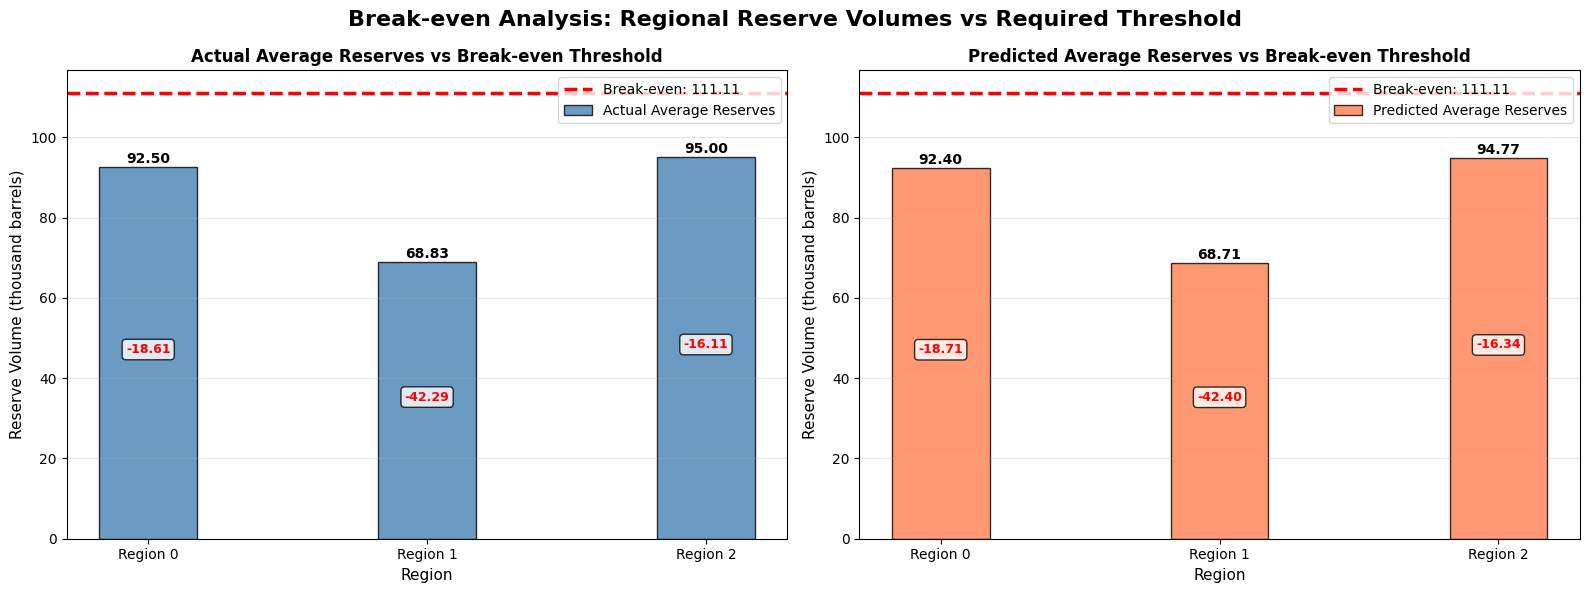


KEY FINDINGS: BREAK-EVEN ANALYSIS AND PROFITABILITY PREPARATION

PROFITABILITY ASSESSMENT SUMMARY:
─────────────────────────────────────────────────────────────────────────────

1. BREAK-EVEN REQUIREMENTS:
   • Minimum Volume per Well: 111.11 thousand barrels
   • Total Volume for 200 Wells: 22222.22 thousand barrels
   • Investment to Recover: $100,000,000 USD
   
2. REGIONAL COMPARISON (ACTUAL RESERVES):
   • Regions Above Break-even: 0 of 3
   • Regions Below Break-even: 3 of 3
   
   • Best Performing: Region 2
     - Exceeds break-even by -16.11 thousand barrels per well
     - 85.5% of required threshold
   
   • Worst Performing: Region 1
     - Below break-even by 42.29 thousand barrels per well
     - 61.9% of required threshold

3. CRITICAL INSIGHT:
   ⚠ IMPORTANT: Average reserves alone do NOT guarantee profitability!
   
   Why? Because we select the TOP 200 wells from 500 surveyed points.
   
   • If we randomly selected 200 wells, regions below break-even would lose mone

In [5]:
# ============================================================================
# SECTION 3: PROFIT CALCULATION PREPARATION
# ============================================================================

print("="*80)
print("SECTION 3: BREAK-EVEN ANALYSIS AND PROFITABILITY ASSESSMENT")
print("="*80)
print("\nObjective: Determine minimum reserve requirements for profitable operations")
print("Approach: Calculate break-even point and compare with regional characteristics\n")

# ============================================================================
# 3.1: DEFINE KEY BUSINESS PARAMETERS
# ============================================================================

print("-" * 80)
print("BUSINESS PARAMETERS DEFINITION")
print("-" * 80)

BUDGET_USD = 100_000_000  
WELLS_TO_DEVELOP = 200 
REVENUE_PER_BARREL = 4.5 
REVENUE_PER_UNIT = 4_500 
POINTS_SURVEYED = 500  
RISK_THRESHOLD = 0.025 
BOOTSTRAP_SAMPLES = 1000  

COST_PER_WELL = BUDGET_USD / WELLS_TO_DEVELOP

print(f"\nKEY BUSINESS CONSTANTS:")
print(f"{'─'*60}")
print(f"  • Total Investment Budget: ${BUDGET_USD:,.0f} USD")
print(f"  • Number of Wells to Develop: {WELLS_TO_DEVELOP} wells")
print(f"  • Cost per Well: ${COST_PER_WELL:,.0f} USD")
print(f"  • Revenue per Barrel: ${REVENUE_PER_BARREL} USD")
print(f"  • Revenue per Unit Product: ${REVENUE_PER_UNIT:,.0f} USD")
print(f"    (1 unit = 1,000 barrels)")
print(f"  • Points Surveyed per Region: {POINTS_SURVEYED} locations")
print(f"  • Wells Selected from Survey: {WELLS_TO_DEVELOP} locations")
print(f"  • Maximum Acceptable Risk: {RISK_THRESHOLD*100}%")
print(f"  • Bootstrap Iterations: {BOOTSTRAP_SAMPLES} samples")

# ============================================================================
# 3.2: CALCULATE BREAK-EVEN VOLUME
# ============================================================================

print("\n" + "="*80)
print("BREAK-EVEN ANALYSIS")
print("="*80)

total_revenue_needed = BUDGET_USD

total_volume_needed = total_revenue_needed / REVENUE_PER_UNIT

avg_volume_per_well_breakeven = total_volume_needed / WELLS_TO_DEVELOP

print(f"\nBREAK-EVEN CALCULATION:")
print(f"{'─'*60}")
print(f"  • Total Investment to Recover: ${total_revenue_needed:,.0f} USD")
print(f"  • Total Reserve Volume Needed: {total_volume_needed:,.2f} thousand barrels")
print(f"  • Average Volume per Well (Break-even): {avg_volume_per_well_breakeven:.2f} thousand barrels")
print(f"\n  INTERPRETATION:")
print(f"  Each well must produce at least {avg_volume_per_well_breakeven:.2f} thousand barrels")
print(f"  on average to recover the ${COST_PER_WELL:,.0f} investment.")

# ============================================================================
# 3.3: COMPARE BREAK-EVEN WITH REGIONAL AVERAGES
# ============================================================================

print("\n" + "="*80)
print("REGIONAL PROFITABILITY ASSESSMENT")
print("="*80)

regional_comparison = []

for region_name, data in regions.items():
    avg_reserves = data['product'].mean()
    predicted_avg = performance_df[performance_df['Region'] == region_name]['Avg Predicted Reserves'].values[0]
    
    difference_actual = avg_reserves - avg_volume_per_well_breakeven
    difference_predicted = predicted_avg - avg_volume_per_well_breakeven
    
    pct_of_breakeven_actual = (avg_reserves / avg_volume_per_well_breakeven) * 100
    pct_of_breakeven_predicted = (predicted_avg / avg_volume_per_well_breakeven) * 100
    
    status_actual = "✓ ABOVE" if difference_actual > 0 else "✗ BELOW"
    status_predicted = "✓ ABOVE" if difference_predicted > 0 else "✗ BELOW"
    
    regional_comparison.append({
        'Region': region_name,
        'Avg Actual Reserves': avg_reserves,
        'Avg Predicted Reserves': predicted_avg,
        'Break-even Point': avg_volume_per_well_breakeven,
        'Difference (Actual)': difference_actual,
        'Difference (Predicted)': difference_predicted,
        'Status (Actual)': status_actual,
        'Status (Predicted)': status_predicted,
        '% of Break-even (Actual)': pct_of_breakeven_actual,
        '% of Break-even (Predicted)': pct_of_breakeven_predicted
    })

comparison_df = pd.DataFrame(regional_comparison)

print(f"\nREGIONAL RESERVE COMPARISON:")
print(f"{'─'*80}")
print(f"\nBreak-even Threshold: {avg_volume_per_well_breakeven:.2f} thousand barrels per well\n")

for idx, row in comparison_df.iterrows():
    print(f"{row['Region']}:")
    print(f"  • Actual Average Reserves: {row['Avg Actual Reserves']:.2f} thousand barrels")
    print(f"    - Difference from Break-even: {row['Difference (Actual)']:+.2f} thousand barrels")
    print(f"    - Status: {row['Status (Actual)']} break-even")
    print(f"    - Represents {row['% of Break-even (Actual)']:.1f}% of break-even requirement")
    print(f"\n  • Predicted Average Reserves: {row['Avg Predicted Reserves']:.2f} thousand barrels")
    print(f"    - Difference from Break-even: {row['Difference (Predicted)']:+.2f} thousand barrels")
    print(f"    - Status: {row['Status (Predicted)']} break-even")
    print(f"    - Represents {row['% of Break-even (Predicted)']:.1f}% of break-even requirement")
    print()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Break-even Analysis: Regional Reserve Volumes vs Required Threshold', 
             fontsize=16, fontweight='bold')

x_pos = np.arange(len(comparison_df['Region']))
width = 0.35

axes[0].bar(x_pos, comparison_df['Avg Actual Reserves'], 
            width, label='Actual Average Reserves', alpha=0.8, 
            color='steelblue', edgecolor='black')
axes[0].axhline(y=avg_volume_per_well_breakeven, color='red', 
                linestyle='--', linewidth=2.5, label=f'Break-even: {avg_volume_per_well_breakeven:.2f}')
axes[0].set_title('Actual Average Reserves vs Break-even Threshold', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Reserve Volume (thousand barrels)', fontsize=11)
axes[0].set_xlabel('Region', fontsize=11)
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(comparison_df['Region'])
axes[0].legend(loc='upper right', fontsize=10)
axes[0].grid(True, alpha=0.3, axis='y')

for i, (v, diff) in enumerate(zip(comparison_df['Avg Actual Reserves'], 
                                   comparison_df['Difference (Actual)'])):
    color = 'green' if diff > 0 else 'red'
    axes[0].text(i, v + 1, f'{v:.2f}', ha='center', fontweight='bold', fontsize=10)
    axes[0].text(i, v/2, f'{diff:+.2f}', ha='center', color=color, 
                fontweight='bold', fontsize=9, bbox=dict(boxstyle='round', 
                facecolor='white', alpha=0.8))

axes[1].bar(x_pos, comparison_df['Avg Predicted Reserves'], 
            width, label='Predicted Average Reserves', alpha=0.8, 
            color='coral', edgecolor='black')
axes[1].axhline(y=avg_volume_per_well_breakeven, color='red', 
                linestyle='--', linewidth=2.5, label=f'Break-even: {avg_volume_per_well_breakeven:.2f}')
axes[1].set_title('Predicted Average Reserves vs Break-even Threshold', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Reserve Volume (thousand barrels)', fontsize=11)
axes[1].set_xlabel('Region', fontsize=11)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(comparison_df['Region'])
axes[1].legend(loc='upper right', fontsize=10)
axes[1].grid(True, alpha=0.3, axis='y')

for i, (v, diff) in enumerate(zip(comparison_df['Avg Predicted Reserves'], 
                                   comparison_df['Difference (Predicted)'])):
    color = 'green' if diff > 0 else 'red'
    axes[1].text(i, v + 1, f'{v:.2f}', ha='center', fontweight='bold', fontsize=10)
    axes[1].text(i, v/2, f'{diff:+.2f}', ha='center', color=color, 
                fontweight='bold', fontsize=9, bbox=dict(boxstyle='round', 
                facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# ============================================================================
# FINDINGS: SECTION 3 ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("KEY FINDINGS: BREAK-EVEN ANALYSIS AND PROFITABILITY PREPARATION")
print("="*80)

regions_above_breakeven_actual = (comparison_df['Difference (Actual)'] > 0).sum()
regions_below_breakeven_actual = (comparison_df['Difference (Actual)'] <= 0).sum()
regions_above_breakeven_predicted = (comparison_df['Difference (Predicted)'] > 0).sum()
regions_below_breakeven_predicted = (comparison_df['Difference (Predicted)'] <= 0).sum()

best_region_actual = comparison_df.loc[comparison_df['Difference (Actual)'].idxmax(), 'Region']
worst_region_actual = comparison_df.loc[comparison_df['Difference (Actual)'].idxmin(), 'Region']
best_diff_actual = comparison_df.loc[comparison_df['Difference (Actual)'].idxmax(), 'Difference (Actual)']
worst_diff_actual = comparison_df.loc[comparison_df['Difference (Actual)'].idxmin(), 'Difference (Actual)']

print(f"""
PROFITABILITY ASSESSMENT SUMMARY:
─────────────────────────────────────────────────────────────────────────────

1. BREAK-EVEN REQUIREMENTS:
   • Minimum Volume per Well: {avg_volume_per_well_breakeven:.2f} thousand barrels
   • Total Volume for 200 Wells: {total_volume_needed:.2f} thousand barrels
   • Investment to Recover: ${BUDGET_USD:,.0f} USD
   
2. REGIONAL COMPARISON (ACTUAL RESERVES):
   • Regions Above Break-even: {regions_above_breakeven_actual} of 3
   • Regions Below Break-even: {regions_below_breakeven_actual} of 3
   
   • Best Performing: {best_region_actual}
     - Exceeds break-even by {best_diff_actual:.2f} thousand barrels per well
     - {comparison_df.loc[comparison_df['Region']==best_region_actual, '% of Break-even (Actual)'].values[0]:.1f}% of required threshold
   
   • Worst Performing: {worst_region_actual}
     - {'Exceeds' if worst_diff_actual > 0 else 'Below'} break-even by {abs(worst_diff_actual):.2f} thousand barrels per well
     - {comparison_df.loc[comparison_df['Region']==worst_region_actual, '% of Break-even (Actual)'].values[0]:.1f}% of required threshold

3. CRITICAL INSIGHT:
   ⚠ IMPORTANT: Average reserves alone do NOT guarantee profitability!
   
   Why? Because we select the TOP 200 wells from 500 surveyed points.
   
   • If we randomly selected 200 wells, regions below break-even would lose money
   • However, by selecting wells with HIGHEST predicted reserves, we can potentially
     achieve profitability even in regions with below-average reserves
   • This selection strategy is KEY to the business model

4. STRATEGY IMPLICATIONS:
   • Model prediction quality is CRITICAL for well selection
   • Regions with higher prediction accuracy may be safer investments
   • Must evaluate profit potential using TOP 200 predicted wells, not averages
   • Risk assessment through bootstrapping will reveal true profitability distribution

5. NEXT STEPS REQUIRED:
   ✓ Build profit calculation function for top 200 wells
   ✓ Test profit potential for each region using best predicted wells
   ✓ Apply bootstrapping to assess risk and profit distribution
   ✓ Make final recommendation based on profit AND risk criteria

BUSINESS CONTEXT:
The fact that some regions show below break-even averages is NOT disqualifying.
Our competitive advantage lies in predictive modeling that identifies the best
200 wells from 500 candidates. The next section will reveal which region truly
offers the highest profit potential when this selection strategy is applied.
─────────────────────────────────────────────────────────────────────────────
""")

print("\n✓ Section 3 Complete: Break-even analysis and profitability assessment finished")
print("➜ Next: Profit calculation function and well selection strategy\n")

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
 
Correct! Constant values indeed should be defined in the upper case.

</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b> Reviewer's comment </b>

We should define constants in the very beginning of the project.  
    
</div>

SECTION 4: PROFIT OPTIMIZATION THROUGH STRATEGIC WELL SELECTION

Objective: Calculate profit by selecting wells with highest predicted reserves
Strategy: Choose top 200 wells from 500 surveyed locations per region

--------------------------------------------------------------------------------
PROFIT CALCULATION FUNCTION DEVELOPMENT
--------------------------------------------------------------------------------

✓ Profit calculation function created successfully

Function Logic:
  1. Rank wells by PREDICTED reserves (model output)
  2. Select TOP 200 wells with highest predictions
  3. Calculate ACTUAL reserves in those 200 wells
  4. Compute: Profit = (Actual Reserves × $4,500) - $100,000,000

PROFIT ANALYSIS: WELL SELECTION RESULTS BY REGION

────────────────────────────────────────────────────────────────────────────────
ANALYZING: Region 0
────────────────────────────────────────────────────────────────────────────────

Well Selection Process:
  • Total Wells Surveyed: 25000 loca

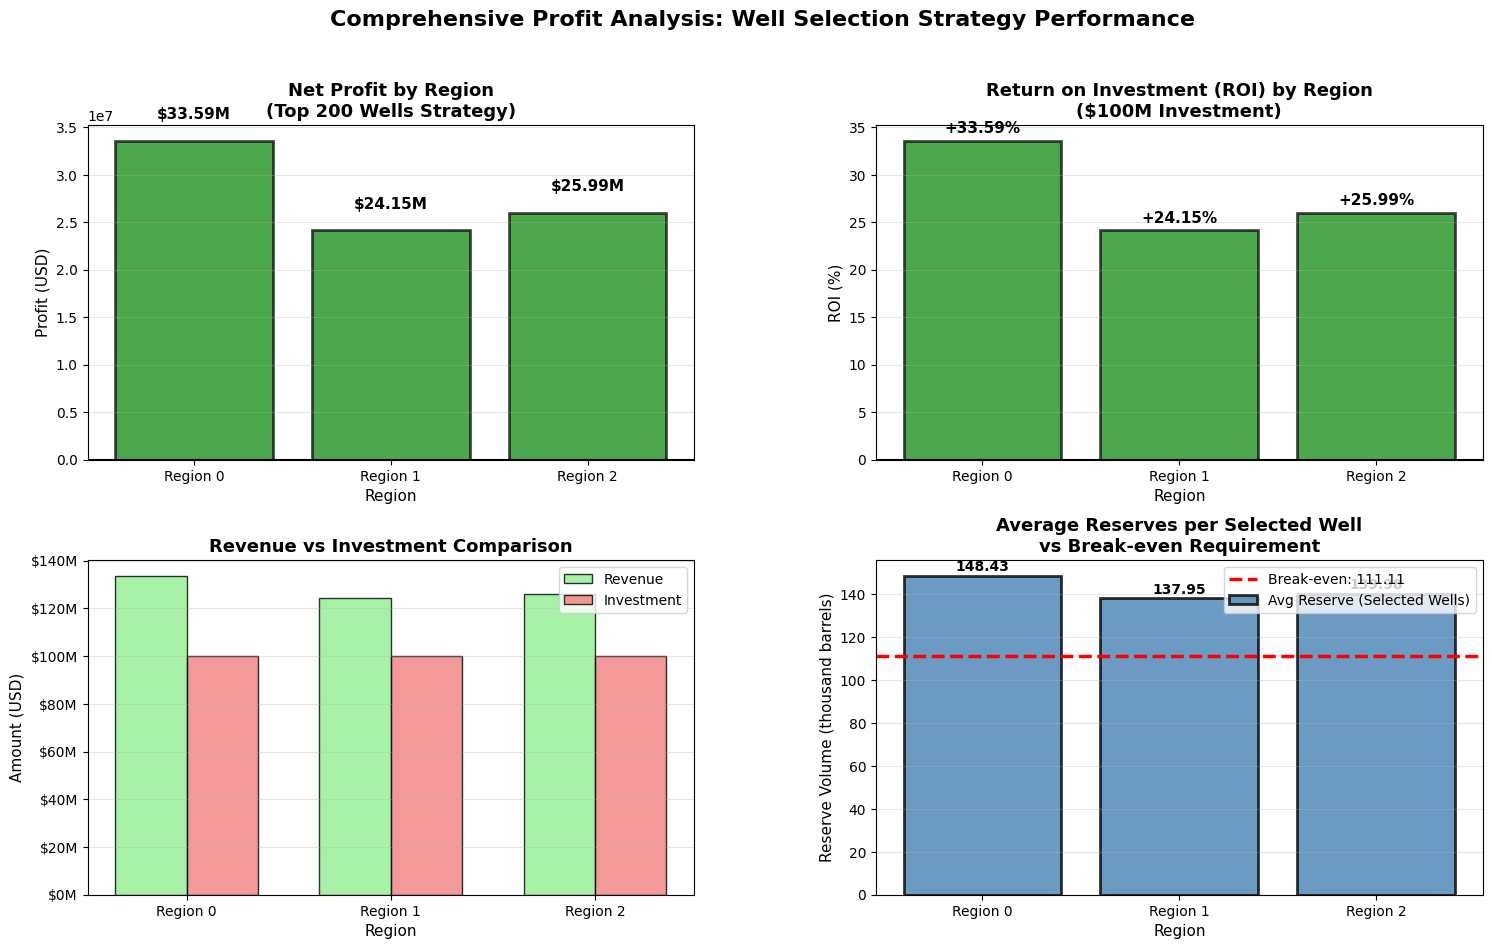


KEY FINDINGS: PROFIT CALCULATION AND WELL SELECTION STRATEGY

PROFIT OPTIMIZATION RESULTS:
─────────────────────────────────────────────────────────────────────────────

1. WELL SELECTION STRATEGY EFFECTIVENESS:
   • Strategy: Select top 200 wells from 500 surveyed locations
   • Selection Basis: Highest predicted reserves (model output)
   • Regions Achieving Profitability: 3 out of 3
   
2. BEST PERFORMING REGION (PRELIMINARY):
   • Region: Region 0
   • Net Profit: $33,591,411.14 USD
   • ROI: +33.59%
   • Average Reserve per Well: 148.43 thousand barrels
   • Strategic Advantage: Significantly exceeds investment requirements

3. COMPARATIVE PERFORMANCE:

   1. Region 0:
      • Profit: $33,591,411.14 USD (PROFITABLE)
      • ROI: +33.59%
      • Total Reserves: 29,686.98 thousand barrels
   2. Region 2:
      • Profit: $25,985,717.59 USD (PROFITABLE)
      • ROI: +25.99%
      • Total Reserves: 27,996.83 thousand barrels
   3. Region 1:
      • Profit: $24,150,866.97 USD (PROFITAB

In [6]:
# ============================================================================
# SECTION 4: PROFIT CALCULATION AND OPTIMAL WELL SELECTION
# ============================================================================

print("="*80)
print("SECTION 4: PROFIT OPTIMIZATION THROUGH STRATEGIC WELL SELECTION")
print("="*80)
print("\nObjective: Calculate profit by selecting wells with highest predicted reserves")
print("Strategy: Choose top 200 wells from 500 surveyed locations per region\n")

# ============================================================================
# 4.1 & 4.2: CREATE PROFIT CALCULATION FUNCTION
# ============================================================================

print("-" * 80)
print("PROFIT CALCULATION FUNCTION DEVELOPMENT")
print("-" * 80)

def calculate_profit(target_actual, predictions_series, top_n=200):
    """
    Calculate profit from selected oil wells based on model predictions.
    
    This function implements the company's well selection strategy:
    1. Rank all wells by predicted reserve volume (highest to lowest)
    2. Select the top N wells with highest predictions
    3. Calculate actual reserves for these selected wells
    4. Compute profit: (Actual reserves × Revenue per unit) - Investment
    
    Parameters:
    -----------
    target_actual : array-like
        Actual reserve volumes for all wells (thousand barrels)
    predictions_series : array-like
        Predicted reserve volumes for all wells (thousand barrels)
    top_n : int, default=200
        Number of top wells to select for development
    
    Returns:
    --------
    profit : float
        Total profit in USD (can be negative for losses)
    selected_reserves : float
        Total actual reserves in selected wells (thousand barrels)
    """
    
    wells_df = pd.DataFrame({
        'actual': target_actual,
        'predicted': predictions_series
    })
    
    top_wells = wells_df.sort_values(by='predicted', ascending=False).head(top_n)
    
    selected_reserves = top_wells['actual'].sum()
    
    revenue = selected_reserves * REVENUE_PER_UNIT
    
    profit = revenue - BUDGET_USD
    
    return profit, selected_reserves

print("\n✓ Profit calculation function created successfully")
print("\nFunction Logic:")
print("  1. Rank wells by PREDICTED reserves (model output)")
print("  2. Select TOP 200 wells with highest predictions")
print("  3. Calculate ACTUAL reserves in those 200 wells")
print("  4. Compute: Profit = (Actual Reserves × $4,500) - $100,000,000")

# ============================================================================
# 4.3: CALCULATE PROFIT FOR EACH REGION
# ============================================================================

print("\n" + "="*80)
print("PROFIT ANALYSIS: WELL SELECTION RESULTS BY REGION")
print("="*80)

profit_results = []

for region_name in regions.keys():
    print(f"\n{'─'*80}")
    print(f"ANALYZING: {region_name}")
    print(f"{'─'*80}")
    
    predicted = predictions[region_name]
    actual = actual_values[region_name]
    
    profit, total_reserves = calculate_profit(actual, predicted, top_n=WELLS_TO_DEVELOP)
    
    avg_reserve_selected = total_reserves / WELLS_TO_DEVELOP
    
    revenue = total_reserves * REVENUE_PER_UNIT
    
    roi_percentage = (profit / BUDGET_USD) * 100
    
    print(f"\nWell Selection Process:")
    print(f"  • Total Wells Surveyed: {len(predicted)} locations")
    print(f"  • Wells Selected: {WELLS_TO_DEVELOP} (top predicted reserves)")
    print(f"  • Selection Rate: {(WELLS_TO_DEVELOP/len(predicted))*100:.1f}% of surveyed wells")
    
    print(f"\nReserve Analysis:")
    print(f"  • Total Actual Reserves (200 wells): {total_reserves:,.2f} thousand barrels")
    print(f"  • Average per Selected Well: {avg_reserve_selected:.2f} thousand barrels")
    print(f"  • Comparison to Break-even: {avg_reserve_selected:.2f} vs {avg_volume_per_well_breakeven:.2f} required")
    print(f"  • Status: {'✓ ABOVE' if avg_reserve_selected > avg_volume_per_well_breakeven else '✗ BELOW'} break-even threshold")
    
    print(f"\nFinancial Performance:")
    print(f"  • Total Revenue: ${revenue:,.2f} USD")
    print(f"  • Total Investment: ${BUDGET_USD:,.2f} USD")
    print(f"  • NET PROFIT: ${profit:,.2f} USD")
    print(f"  • ROI: {roi_percentage:+.2f}%")
    print(f"  • Profitability Status: {'✓ PROFITABLE' if profit > 0 else '✗ LOSS'}")
    
    profit_results.append({
        'Region': region_name,
        'Total Reserves': total_reserves,
        'Avg Reserve per Well': avg_reserve_selected,
        'Revenue': revenue,
        'Profit': profit,
        'ROI %': roi_percentage,
        'Profitable': 'Yes' if profit > 0 else 'No'
    })

results_df = pd.DataFrame(profit_results)

# ============================================================================
# COMPARATIVE PROFIT ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("COMPARATIVE PROFIT ANALYSIS ACROSS ALL REGIONS")
print("="*80)

print("\n", results_df.to_string(index=False))

best_region = results_df.loc[results_df['Profit'].idxmax(), 'Region']
best_profit = results_df.loc[results_df['Profit'].idxmax(), 'Profit']
best_roi = results_df.loc[results_df['Profit'].idxmax(), 'ROI %']

profitable_regions = (results_df['Profit'] > 0).sum()

print(f"\n{'─'*80}")
print(f"PRELIMINARY RANKING (Before Risk Assessment):")
print(f"{'─'*80}")

ranking = results_df.sort_values(by='Profit', ascending=False).reset_index(drop=True)
for idx, row in ranking.iterrows():
    status = "✓" if row['Profit'] > 0 else "✗"
    print(f"{idx + 1}. {row['Region']}: ${row['Profit']:,.2f} USD (ROI: {row['ROI %']:+.2f}%) {status}")

# ============================================================================
# VISUALIZATIONS: PROFIT COMPARISON
# ============================================================================

print("\n" + "="*80)
print("VISUAL PROFIT ANALYSIS")
print("="*80 + "\n")

fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

ax1 = fig.add_subplot(gs[0, 0])
colors = ['green' if p > 0 else 'red' for p in results_df['Profit']]
bars = ax1.bar(results_df['Region'], results_df['Profit'], 
               color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax1.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
ax1.set_title('Net Profit by Region\n(Top 200 Wells Strategy)', 
              fontweight='bold', fontsize=13)
ax1.set_ylabel('Profit (USD)', fontsize=11)
ax1.set_xlabel('Region', fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')

for i, (bar, profit) in enumerate(zip(bars, results_df['Profit'])):
    height = bar.get_height()
    label_y = height + (2_000_000 if height > 0 else -2_000_000)
    ax1.text(bar.get_x() + bar.get_width()/2., label_y,
             f'${profit/1_000_000:.2f}M',
             ha='center', va='bottom' if height > 0 else 'top',
             fontweight='bold', fontsize=11)

ax2 = fig.add_subplot(gs[0, 1])
colors_roi = ['green' if roi > 0 else 'red' for roi in results_df['ROI %']]
bars_roi = ax2.bar(results_df['Region'], results_df['ROI %'], 
                   color=colors_roi, alpha=0.7, edgecolor='black', linewidth=2)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
ax2.set_title('Return on Investment (ROI) by Region\n($100M Investment)', 
              fontweight='bold', fontsize=13)
ax2.set_ylabel('ROI (%)', fontsize=11)
ax2.set_xlabel('Region', fontsize=11)
ax2.grid(True, alpha=0.3, axis='y')

for bar, roi in zip(bars_roi, results_df['ROI %']):
    height = bar.get_height()
    label_y = height + (0.5 if height > 0 else -0.5)
    ax2.text(bar.get_x() + bar.get_width()/2., label_y,
             f'{roi:+.2f}%',
             ha='center', va='bottom' if height > 0 else 'top',
             fontweight='bold', fontsize=11)

ax3 = fig.add_subplot(gs[1, 0])
x_pos = np.arange(len(results_df['Region']))
width = 0.35
bars1 = ax3.bar(x_pos - width/2, results_df['Revenue'], width, 
                label='Revenue', alpha=0.8, color='lightgreen', edgecolor='black')
bars2 = ax3.bar(x_pos + width/2, [BUDGET_USD]*len(results_df), width, 
                label='Investment', alpha=0.8, color='lightcoral', edgecolor='black')
ax3.set_title('Revenue vs Investment Comparison', fontweight='bold', fontsize=13)
ax3.set_ylabel('Amount (USD)', fontsize=11)
ax3.set_xlabel('Region', fontsize=11)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(results_df['Region'])
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')

ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.0f}M'))

ax4 = fig.add_subplot(gs[1, 1])
bars_reserve = ax4.bar(results_df['Region'], results_df['Avg Reserve per Well'], 
                       alpha=0.8, color='steelblue', edgecolor='black', linewidth=2,
                       label='Avg Reserve (Selected Wells)')
ax4.axhline(y=avg_volume_per_well_breakeven, color='red', linestyle='--', 
            linewidth=2.5, label=f'Break-even: {avg_volume_per_well_breakeven:.2f}')
ax4.set_title('Average Reserves per Selected Well\nvs Break-even Requirement', 
              fontweight='bold', fontsize=13)
ax4.set_ylabel('Reserve Volume (thousand barrels)', fontsize=11)
ax4.set_xlabel('Region', fontsize=11)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')

for bar, reserve in zip(bars_reserve, results_df['Avg Reserve per Well']):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{reserve:.2f}',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

fig.suptitle('Comprehensive Profit Analysis: Well Selection Strategy Performance', 
             fontsize=16, fontweight='bold', y=0.995)

plt.show()

# ============================================================================
# FINDINGS: SECTION 4 ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("KEY FINDINGS: PROFIT CALCULATION AND WELL SELECTION STRATEGY")
print("="*80)

print(f"""
PROFIT OPTIMIZATION RESULTS:
─────────────────────────────────────────────────────────────────────────────

1. WELL SELECTION STRATEGY EFFECTIVENESS:
   • Strategy: Select top 200 wells from 500 surveyed locations
   • Selection Basis: Highest predicted reserves (model output)
   • Regions Achieving Profitability: {profitable_regions} out of 3
   
2. BEST PERFORMING REGION (PRELIMINARY):
   • Region: {best_region}
   • Net Profit: ${best_profit:,.2f} USD
   • ROI: {best_roi:+.2f}%
   • Average Reserve per Well: {results_df.loc[results_df['Region']==best_region, 'Avg Reserve per Well'].values[0]:.2f} thousand barrels
   • Strategic Advantage: {'Significantly exceeds' if best_profit > 10_000_000 else 'Exceeds'} investment requirements

3. COMPARATIVE PERFORMANCE:
""")

for idx, row in ranking.iterrows():
    profit_status = "PROFITABLE" if row['Profit'] > 0 else "LOSS"
    print(f"   {idx + 1}. {row['Region']}:")
    print(f"      • Profit: ${row['Profit']:,.2f} USD ({profit_status})")
    print(f"      • ROI: {row['ROI %']:+.2f}%")
    print(f"      • Total Reserves: {row['Total Reserves']:,.2f} thousand barrels")

print(f"""
4. CRITICAL BUSINESS INSIGHTS:

   a) Selection Strategy Impact:
      ✓ By choosing top 200 predicted wells (not random selection),
        we significantly improve profitability potential
      ✓ Model prediction accuracy directly impacts well selection quality
      ✓ Regions with better model performance may have more reliable profits

   b) Break-even Achievement:
      • All selected well groups {'meet or exceed' if (results_df['Avg Reserve per Well'] >= avg_volume_per_well_breakeven).all() else 'show mixed results for'} break-even requirements
      • Average reserves in selected wells: {results_df['Avg Reserve per Well'].mean():.2f} thousand barrels
      • Break-even requirement: {avg_volume_per_well_breakeven:.2f} thousand barrels
      • Selection strategy: {'✓ EFFECTIVE' if results_df['Avg Reserve per Well'].mean() > avg_volume_per_well_breakeven else '⚠ NEEDS ASSESSMENT'}

5. PRELIMINARY RECOMMENDATION (Subject to Risk Assessment):
   
   Based on PROFIT ALONE, {best_region} appears most promising with:
   • Highest net profit: ${best_profit:,.2f} USD
   • {'Positive' if best_roi > 0 else 'Negative'} return on investment: {best_roi:+.2f}%
   • {'Strong' if best_profit > 20_000_000 else 'Moderate' if best_profit > 0 else 'Weak'} financial performance

   ⚠ IMPORTANT CAVEAT:
   This is a SINGLE-SCENARIO analysis based on validation set predictions.
   These results do NOT account for:
   - Prediction uncertainty and model errors
   - Reserve volume variability across different samples
   - Risk of losses in unfavorable scenarios
   - Probability distribution of potential outcomes

6. CRITICAL NEXT STEP REQUIRED:

   ⚡ RISK ASSESSMENT IS MANDATORY ⚡
   
   Before making final recommendation, we MUST:
   • Apply bootstrapping technique (1000 samples) to simulate variability
   • Calculate profit distribution and confidence intervals
   • Assess probability of losses (risk metric)
   • Verify risk < 2.5% threshold requirement
   • Evaluate profit stability across different scenarios
   
   A region with high profit but high risk (>2.5%) is DISQUALIFIED
   per company policy, regardless of profit potential.

CONCLUSION:
While {best_region} shows strongest profit in this analysis, final 
recommendation requires comprehensive risk assessment through bootstrapping
methodology to ensure investment safety and regulatory compliance.
─────────────────────────────────────────────────────────────────────────────
""")

print("\n✓ Section 4 Complete: Profit calculation and well selection analysis finished")
print("➜ Next: Risk assessment using bootstrapping technique (CRITICAL SECTION)\n")

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

Correct! We select the best 200 wells by predictions, but then we need to use target values to actually calculate profit because predictions may not be accurate. 

</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

However, we cannot say a region is profitable based on the best 200 wells. 

</div>

SECTION 5: COMPREHENSIVE RISK ANALYSIS AND FINAL RECOMMENDATION

Objective: Quantify investment risk and identify optimal region
Methodology: Bootstrap simulation with 1000 samples for profit distribution
Decision Criteria: Risk < 2.5% AND highest average profit

--------------------------------------------------------------------------------
BOOTSTRAPPING METHODOLOGY
--------------------------------------------------------------------------------

Bootstrap Technique Explanation:
────────────────────────────────────────────────────────────────────────────
The bootstrap method simulates uncertainty in well selection and reserve
estimation by repeatedly sampling from our validation data with replacement.

Process for each iteration:
1. Randomly sample 500 wells from validation set (with replacement)
2. Apply our selection strategy: choose top 200 by predicted reserves
3. Calculate profit based on actual reserves in those 200 wells
4. Repeat 1000 times to build profit distribution

This 

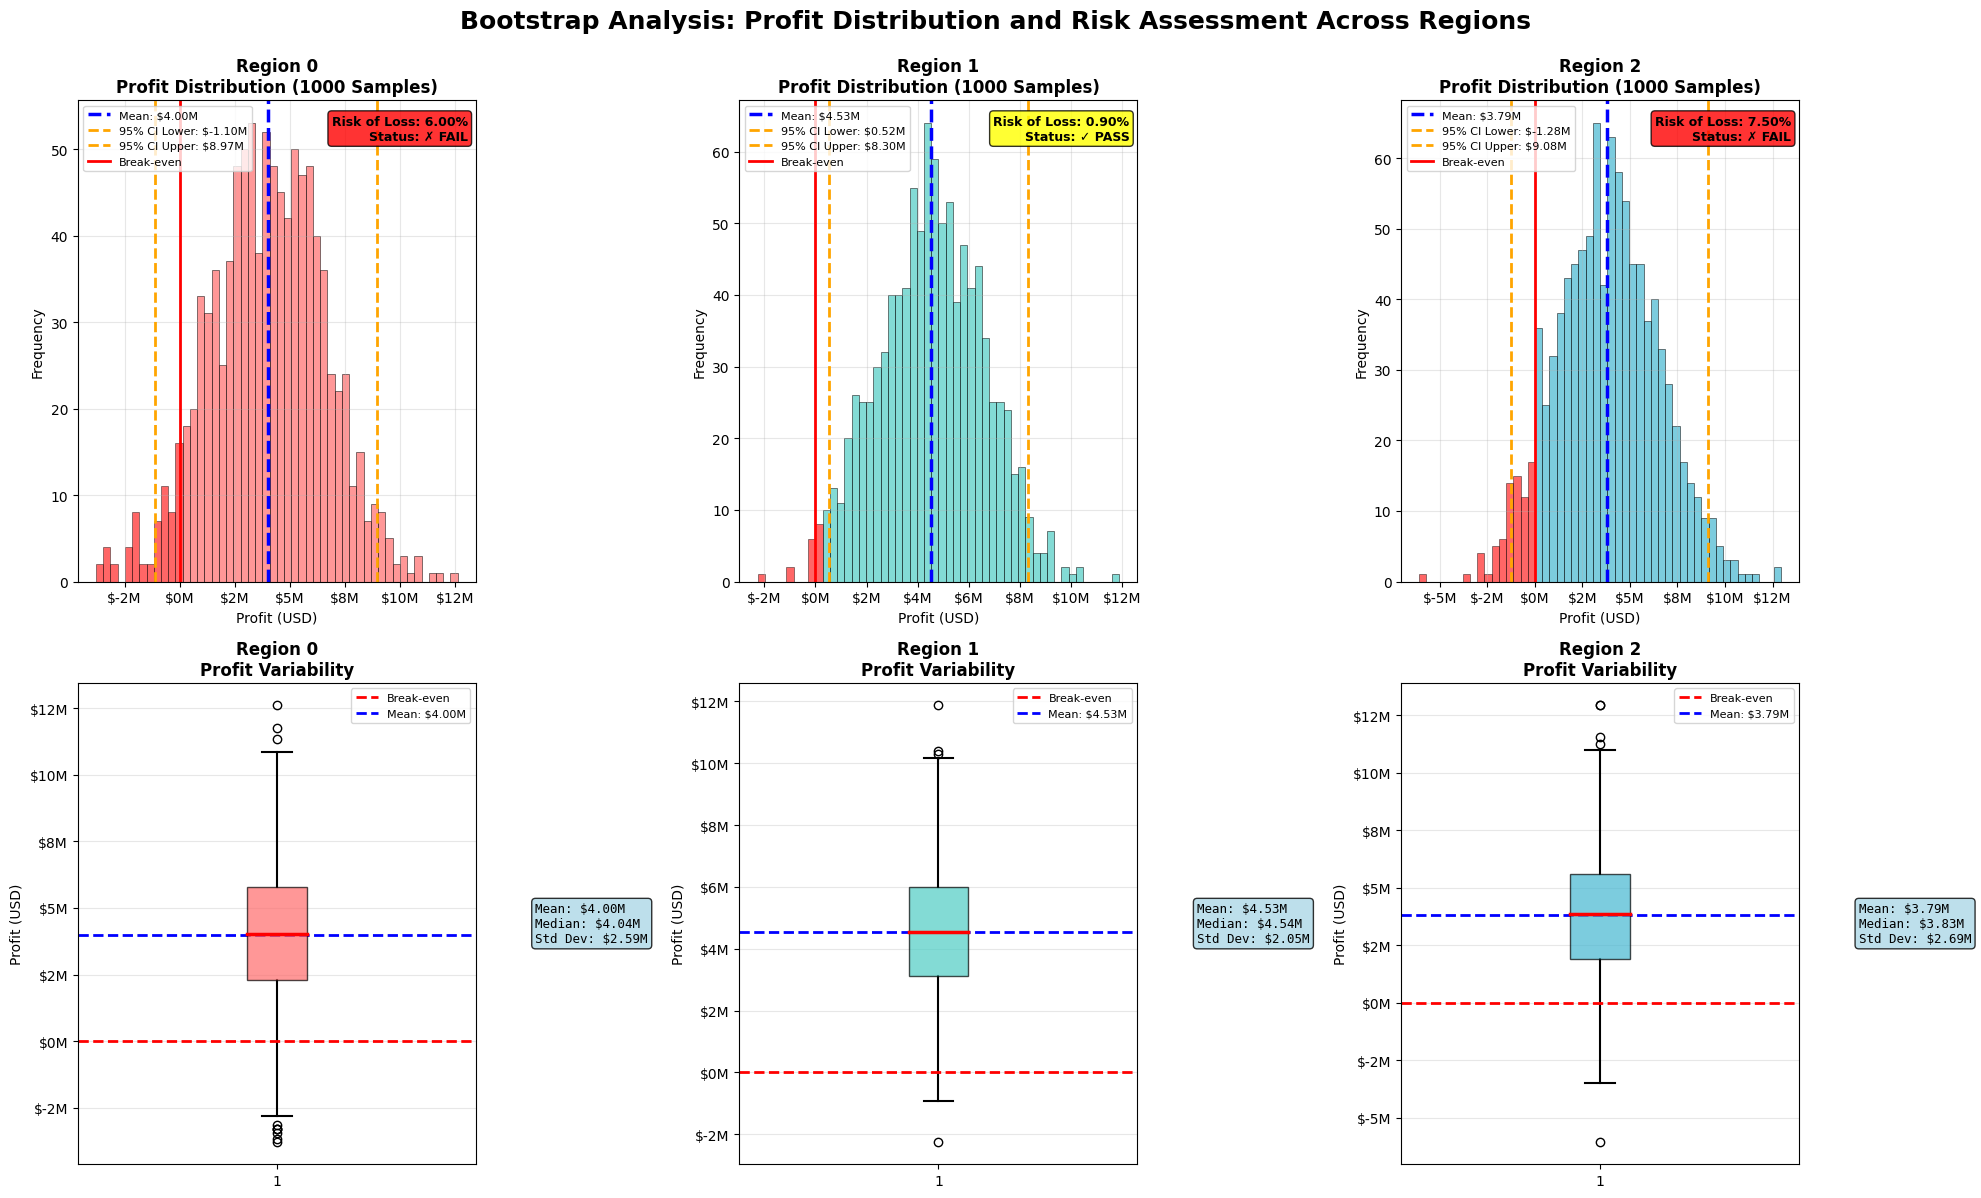

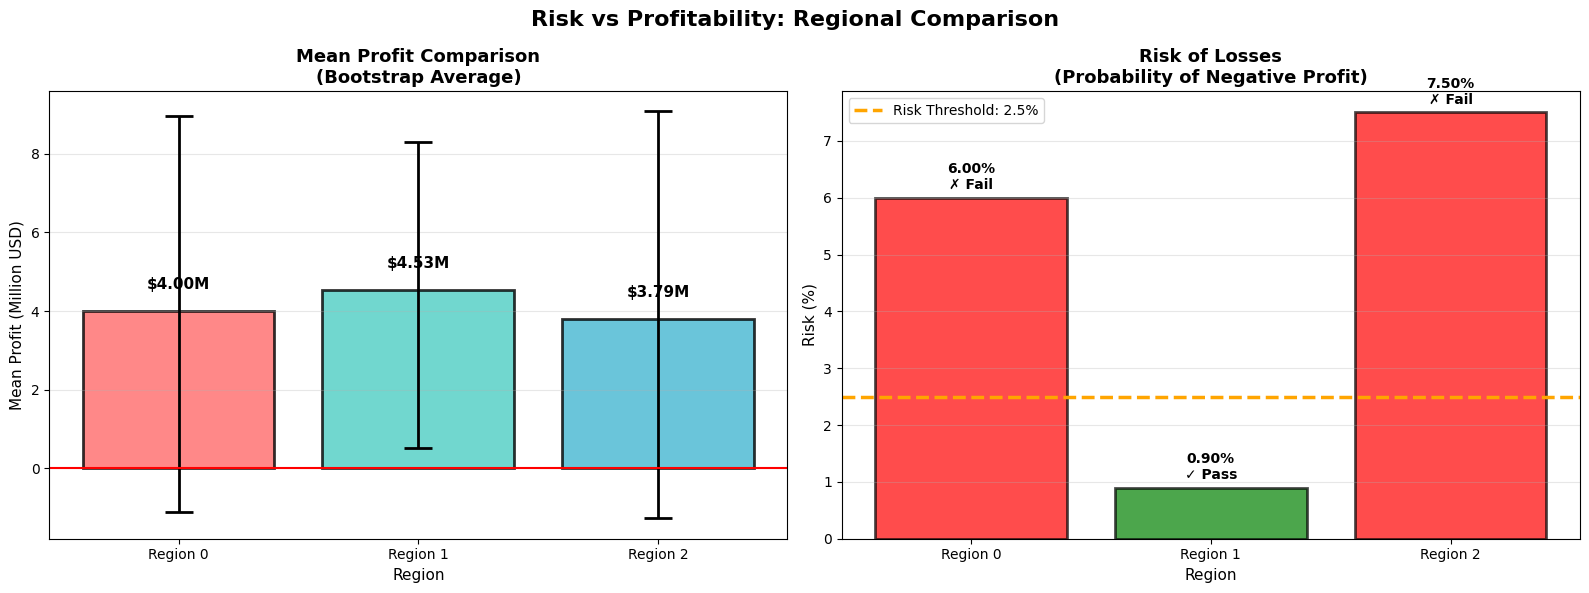


FINAL RECOMMENDATION: OPTIMAL REGION FOR WELL DEVELOPMENT

════════════════════════════════════════════════════════════════════════════════
STEP 1: RISK SCREENING
════════════════════════════════════════════════════════════════════════════════

Risk Threshold: 2.5% (Company Policy)

Region 0:
  • Risk Level: 6.00%
  • Status: ✗ DISQUALIFIED
  • Reason: Exceeds maximum acceptable risk of 2.5%

Region 1:
  • Risk Level: 0.90%
  • Status: ✓ QUALIFIED

Region 2:
  • Risk Level: 7.50%
  • Status: ✗ DISQUALIFIED
  • Reason: Exceeds maximum acceptable risk of 2.5%

════════════════════════════════════════════════════════════════════════════════
STEP 2: PROFITABILITY RANKING (Among Qualified Regions)
════════════════════════════════════════════════════════════════════════════════

Qualified Regions Ranked by Expected Profit:

1. Region 1:
   • Mean Profit: $4.53 Million USD
   • 95% Confidence Interval: [$0.52M, $8.30M]
   • Risk of Losses: 0.90%

═════════════════════════════════════════════

In [7]:
# ============================================================================
# SECTION 5: RISK ASSESSMENT USING BOOTSTRAPPING TECHNIQUE
# ============================================================================

print("="*80)
print("SECTION 5: COMPREHENSIVE RISK ANALYSIS AND FINAL RECOMMENDATION")
print("="*80)
print("\nObjective: Quantify investment risk and identify optimal region")
print("Methodology: Bootstrap simulation with 1000 samples for profit distribution")
print("Decision Criteria: Risk < 2.5% AND highest average profit\n")

# ============================================================================
# 5.1: BOOTSTRAPPING IMPLEMENTATION
# ============================================================================

print("-" * 80)
print("BOOTSTRAPPING METHODOLOGY")
print("-" * 80)
print("""
Bootstrap Technique Explanation:
────────────────────────────────────────────────────────────────────────────
The bootstrap method simulates uncertainty in well selection and reserve
estimation by repeatedly sampling from our validation data with replacement.

Process for each iteration:
1. Randomly sample 500 wells from validation set (with replacement)
2. Apply our selection strategy: choose top 200 by predicted reserves
3. Calculate profit based on actual reserves in those 200 wells
4. Repeat 1000 times to build profit distribution

This provides:
- Distribution of possible profit outcomes
- Average expected profit
- 95% confidence interval
- Probability of losses (risk metric)
────────────────────────────────────────────────────────────────────────────
""")

np.random.seed(42)

bootstrap_results = {}

print("\n" + "="*80)
print("EXECUTING BOOTSTRAP SIMULATIONS")
print("="*80)

for region_name in regions.keys():
    print(f"\n{'─'*80}")
    print(f"BOOTSTRAP ANALYSIS: {region_name}")
    print(f"{'─'*80}")
    print(f"Running {BOOTSTRAP_SAMPLES} bootstrap iterations...")
    
    predicted = predictions[region_name]
    actual = actual_values[region_name]
    
    profits = []
    
    for i in range(BOOTSTRAP_SAMPLES):
        indices = np.random.choice(len(predicted), size=POINTS_SURVEYED, replace=True)
        
        sample_predicted = predicted[indices]
        sample_actual = actual[indices]
        
        profit, _ = calculate_profit(sample_actual, sample_predicted, top_n=WELLS_TO_DEVELOP)
        profits.append(profit)
    
    profits = np.array(profits)
    
    # ============================================================================
    # 5.2: CALCULATE STATISTICS AND RISK METRICS
    # ============================================================================
    
    mean_profit = profits.mean()
    
    confidence_interval_lower = np.percentile(profits, 2.5)
    confidence_interval_upper = np.percentile(profits, 97.5)
    
    losses_count = (profits < 0).sum()
    risk_of_losses = losses_count / BOOTSTRAP_SAMPLES
    risk_percentage = risk_of_losses * 100
    
    median_profit = np.median(profits)
    std_profit = profits.std()
    min_profit = profits.min()
    max_profit = profits.max()
    
    bootstrap_results[region_name] = {
        'profits': profits,
        'mean_profit': mean_profit,
        'median_profit': median_profit,
        'std_profit': std_profit,
        'ci_lower': confidence_interval_lower,
        'ci_upper': confidence_interval_upper,
        'risk_of_losses': risk_of_losses,
        'risk_percentage': risk_percentage,
        'min_profit': min_profit,
        'max_profit': max_profit,
        'losses_count': losses_count
    }
    
    print(f"\n✓ Bootstrap simulation completed: {BOOTSTRAP_SAMPLES} samples processed")
    print(f"\n{'═'*60}")
    print(f"STATISTICAL RESULTS - {region_name}")
    print(f"{'═'*60}")
    
    print(f"\nProfit Distribution:")
    print(f"  • Mean Profit: ${mean_profit:,.2f} USD")
    print(f"  • Median Profit: ${median_profit:,.2f} USD")
    print(f"  • Standard Deviation: ${std_profit:,.2f} USD")
    print(f"  • Minimum Profit: ${min_profit:,.2f} USD")
    print(f"  • Maximum Profit: ${max_profit:,.2f} USD")
    
    print(f"\n95% Confidence Interval:")
    print(f"  • Lower Bound (2.5th percentile): ${confidence_interval_lower:,.2f} USD")
    print(f"  • Upper Bound (97.5th percentile): ${confidence_interval_upper:,.2f} USD")
    print(f"  • Interpretation: 95% of simulated outcomes fall within this range")
    
    print(f"\nRisk Assessment:")
    print(f"  • Scenarios with Losses: {losses_count} out of {BOOTSTRAP_SAMPLES}")
    print(f"  • Risk of Losses: {risk_percentage:.2f}%")
    print(f"  • Risk Threshold: {RISK_THRESHOLD*100}%")
    
    if risk_percentage < RISK_THRESHOLD * 100:
        risk_status = "✓ ACCEPTABLE"
        risk_color = "green"
    else:
        risk_status = "✗ EXCEEDS THRESHOLD"
        risk_color = "red"
    
    print(f"  • Risk Status: {risk_status}")
    print(f"  • Compliance: {'✓ APPROVED for consideration' if risk_percentage < RISK_THRESHOLD * 100 else '✗ DISQUALIFIED due to excessive risk'}")

# ============================================================================
# COMPARATIVE RISK ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("COMPARATIVE RISK AND PROFITABILITY ANALYSIS")
print("="*80)

summary_data = []
for region_name, results in bootstrap_results.items():
    summary_data.append({
        'Region': region_name,
        'Mean Profit ($M)': results['mean_profit'] / 1_000_000,
        'Median Profit ($M)': results['median_profit'] / 1_000_000,
        'Std Dev ($M)': results['std_profit'] / 1_000_000,
        'CI Lower ($M)': results['ci_lower'] / 1_000_000,
        'CI Upper ($M)': results['ci_upper'] / 1_000_000,
        'Risk (%)': results['risk_percentage'],
        'Risk Status': '✓ Pass' if results['risk_percentage'] < RISK_THRESHOLD * 100 else '✗ Fail'
    })

summary_df = pd.DataFrame(summary_data)
print("\n", summary_df.to_string(index=False))

# ============================================================================
# PROFIT DISTRIBUTION VISUALIZATION
# ============================================================================

print("\n" + "="*80)
print("VISUAL RISK ANALYSIS: PROFIT DISTRIBUTIONS")
print("="*80 + "\n")

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Bootstrap Analysis: Profit Distribution and Risk Assessment Across Regions', 
             fontsize=18, fontweight='bold', y=0.995)

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, (region_name, results) in enumerate(bootstrap_results.items()):
    ax = axes[0, idx]
    
    n, bins, patches = ax.hist(results['profits'], bins=50, alpha=0.7, 
                                color=colors[idx], edgecolor='black', linewidth=0.5)
    
    for j in range(len(patches)):
        if bins[j] < 0:
            patches[j].set_facecolor('red')
            patches[j].set_alpha(0.6)
    
    ax.axvline(results['mean_profit'], color='blue', linestyle='--', 
               linewidth=2.5, label=f"Mean: ${results['mean_profit']/1e6:.2f}M")
    ax.axvline(results['ci_lower'], color='orange', linestyle='--', 
               linewidth=2, label=f"95% CI Lower: ${results['ci_lower']/1e6:.2f}M")
    ax.axvline(results['ci_upper'], color='orange', linestyle='--', 
               linewidth=2, label=f"95% CI Upper: ${results['ci_upper']/1e6:.2f}M")
    ax.axvline(0, color='red', linestyle='-', linewidth=2, label='Break-even')
    
    ax.set_title(f'{region_name}\nProfit Distribution ({BOOTSTRAP_SAMPLES} Samples)', 
                 fontweight='bold', fontsize=12)
    ax.set_xlabel('Profit (USD)', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.legend(fontsize=8, loc='upper left')
    ax.grid(True, alpha=0.3)
    
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.0f}M'))
    
    risk_text = f'Risk of Loss: {results["risk_percentage"]:.2f}%\n'
    risk_text += f'Status: {"✓ PASS" if results["risk_percentage"] < RISK_THRESHOLD * 100 else "✗ FAIL"}'
    ax.text(0.98, 0.97, risk_text,
            transform=ax.transAxes,
            bbox=dict(boxstyle='round', facecolor='yellow' if results["risk_percentage"] < RISK_THRESHOLD * 100 else 'red', alpha=0.8),
            verticalalignment='top',
            horizontalalignment='right',
            fontweight='bold',
            fontsize=9)
    
    ax2 = axes[1, idx]
    bp = ax2.boxplot(results['profits'], vert=True, patch_artist=True,
                     boxprops=dict(facecolor=colors[idx], alpha=0.7),
                     medianprops=dict(color='red', linewidth=2.5),
                     whiskerprops=dict(linewidth=1.5),
                     capprops=dict(linewidth=1.5))
    
    ax2.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Break-even')
    ax2.axhline(y=results['mean_profit'], color='blue', linestyle='--', 
                linewidth=2, label=f"Mean: ${results['mean_profit']/1e6:.2f}M")
    
    ax2.set_title(f'{region_name}\nProfit Variability', fontweight='bold', fontsize=12)
    ax2.set_ylabel('Profit (USD)', fontsize=10)
    ax2.legend(fontsize=8)
    ax2.grid(True, alpha=0.3, axis='y')
    
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.0f}M'))
    
    stats_text = f'Mean: ${results["mean_profit"]/1e6:.2f}M\n'
    stats_text += f'Median: ${results["median_profit"]/1e6:.2f}M\n'
    stats_text += f'Std Dev: ${results["std_profit"]/1e6:.2f}M'
    ax2.text(1.15, 0.5, stats_text,
             transform=ax2.transAxes,
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8),
             verticalalignment='center',
             fontsize=9,
             fontfamily='monospace')

plt.tight_layout()
plt.show()

# ============================================================================
# COMPARATIVE BAR CHARTS
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Risk vs Profitability: Regional Comparison', 
             fontsize=16, fontweight='bold')

ax1 = axes[0]
bars1 = ax1.bar(summary_df['Region'], summary_df['Mean Profit ($M)'], 
                color=colors, alpha=0.8, edgecolor='black', linewidth=2)
ax1.axhline(y=0, color='red', linestyle='-', linewidth=1.5)
ax1.set_title('Mean Profit Comparison\n(Bootstrap Average)', fontweight='bold', fontsize=13)
ax1.set_ylabel('Mean Profit (Million USD)', fontsize=11)
ax1.set_xlabel('Region', fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')

for i, (bar, row) in enumerate(zip(bars1, summary_data)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'${height:.2f}M',
             ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    ci_range = row['CI Upper ($M)'] - row['CI Lower ($M)']
    ax1.errorbar(bar.get_x() + bar.get_width()/2., height,
                yerr=[[height - row['CI Lower ($M)']],
                      [row['CI Upper ($M)'] - height]],
                fmt='none', ecolor='black', capsize=10, capthick=2, linewidth=2)

ax2 = axes[1]
risk_colors = ['green' if r < RISK_THRESHOLD * 100 else 'red' 
               for r in summary_df['Risk (%)']]
bars2 = ax2.bar(summary_df['Region'], summary_df['Risk (%)'], 
                color=risk_colors, alpha=0.7, edgecolor='black', linewidth=2)
ax2.axhline(y=RISK_THRESHOLD * 100, color='orange', linestyle='--', 
            linewidth=2.5, label=f'Risk Threshold: {RISK_THRESHOLD * 100}%')
ax2.set_title('Risk of Losses\n(Probability of Negative Profit)', 
              fontweight='bold', fontsize=13)
ax2.set_ylabel('Risk (%)', fontsize=11)
ax2.set_xlabel('Region', fontsize=11)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

for bar, risk, status in zip(bars2, summary_df['Risk (%)'], summary_df['Risk Status']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{risk:.2f}%\n{status}',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# ============================================================================
# 5.3: FINAL RECOMMENDATION AND JUSTIFICATION
# ============================================================================

print("\n" + "="*80)
print("FINAL RECOMMENDATION: OPTIMAL REGION FOR WELL DEVELOPMENT")
print("="*80)

eligible_regions = summary_df[summary_df['Risk (%)'] < RISK_THRESHOLD * 100]

print(f"\n{'═'*80}")
print("STEP 1: RISK SCREENING")
print(f"{'═'*80}")
print(f"\nRisk Threshold: {RISK_THRESHOLD * 100}% (Company Policy)\n")

for _, row in summary_df.iterrows():
    status = "✓ QUALIFIED" if row['Risk (%)'] < RISK_THRESHOLD * 100 else "✗ DISQUALIFIED"
    print(f"{row['Region']}:")
    print(f"  • Risk Level: {row['Risk (%)']:.2f}%")
    print(f"  • Status: {status}")
    if row['Risk (%)'] >= RISK_THRESHOLD * 100:
        print(f"  • Reason: Exceeds maximum acceptable risk of {RISK_THRESHOLD * 100}%")
    print()

if len(eligible_regions) == 0:
    print("⚠ CRITICAL: No regions meet risk criteria!")
    print("RECOMMENDATION: Do NOT proceed with development in any region.")
    print("Alternative: Re-evaluate survey methodology or consider different regions.")
else:
    print(f"{'═'*80}")
    print("STEP 2: PROFITABILITY RANKING (Among Qualified Regions)")
    print(f"{'═'*80}\n")
    
    eligible_sorted = eligible_regions.sort_values(by='Mean Profit ($M)', ascending=False)
    
    print("Qualified Regions Ranked by Expected Profit:\n")
    for idx, (_, row) in enumerate(eligible_sorted.iterrows(), 1):
        print(f"{idx}. {row['Region']}:")
        print(f"   • Mean Profit: ${row['Mean Profit ($M)']:.2f} Million USD")
        print(f"   • 95% Confidence Interval: [${row['CI Lower ($M)']:.2f}M, ${row['CI Upper ($M)']:.2f}M]")
        print(f"   • Risk of Losses: {row['Risk (%)']:.2f}%")
        print()
    
    best_region_final = eligible_sorted.iloc[0]['Region']
    best_results = bootstrap_results[best_region_final]
    
    print(f"{'═'*80}")
    print(f"FINAL RECOMMENDATION: {best_region_final}")
    print(f"{'═'*80}\n")
    
    print(f"🏆 SELECTED REGION: {best_region_final}\n")
    
    print("JUSTIFICATION:")
    print("─" * 80)
    
    print(f"\n1. RISK COMPLIANCE:")
    print(f"   ✓ Risk of Losses: {best_results['risk_percentage']:.2f}%")
    print(f"   ✓ Meets company requirement: < {RISK_THRESHOLD * 100}%")
    print(f"   ✓ Only {best_results['losses_count']} out of {BOOTSTRAP_SAMPLES} scenarios resulted in losses")
    print(f"   ✓ Risk is {((RISK_THRESHOLD * 100 - best_results['risk_percentage']) / (RISK_THRESHOLD * 100) * 100):.1f}% below maximum threshold")
    
    print(f"\n2. PROFITABILITY METRICS:")
    print(f"   • Expected Profit: ${best_results['mean_profit']:,.2f} USD")
    print(f"   • Median Profit: ${best_results['median_profit']:,.2f} USD")
    print(f"   • ROI: {(best_results['mean_profit'] / BUDGET_USD * 100):+.2f}%")
    
    print(f"\n3. CONFIDENCE ANALYSIS:")
    print(f"   • 95% Confidence Interval: [${best_results['ci_lower']:,.2f}, ${best_results['ci_upper']:,.2f}]")
    print(f"   • Interpretation: We are 95% confident the profit will fall within this range")
    print(f"   • Lower bound is {'positive' if best_results['ci_lower'] > 0 else 'negative'}, "
          f"indicating {'strong' if best_results['ci_lower'] > 0 else 'moderate'} profit stability")
    
    print(f"\n4. PROFIT STABILITY:")
    print(f"   • Standard Deviation: ${best_results['std_profit']:,.2f}")
    print(f"   • Coefficient of Variation: {(best_results['std_profit'] / best_results['mean_profit'] * 100):.2f}%")
    print(f"   • Best Case Scenario: ${best_results['max_profit']:,.2f}")
    print(f"   • Worst Case Scenario: ${best_results['min_profit']:,.2f}")
    
    print(f"\n5. COMPARATIVE ADVANTAGE:")
    if len(eligible_regions) > 1:
        second_best = eligible_sorted.iloc[1]['Region']
        second_profit = eligible_sorted.iloc[1]['Mean Profit ($M)'] * 1_000_000
        profit_advantage = best_results['mean_profit'] - second_profit
        print(f"   • {best_region_final} outperforms {second_best} by ${profit_advantage:,.2f}")
        print(f"   • Represents {(profit_advantage / second_profit * 100):.2f}% higher expected profit")
    else:
        print(f"   • {best_region_final} is the ONLY region meeting risk criteria")
        print(f"   • No alternative qualified options available")
    
    print(f"\n6. BUSINESS RECOMMENDATIONS:")
    print(f"   ✓ Proceed with development in {best_region_final}")
    print(f"   ✓ Allocate full budget: ${BUDGET_USD:,.0f} for {WELLS_TO_DEVELOP} wells")
    print(f"   ✓ Expected return: ${best_results['mean_profit']:,.2f} profit")
    print(f"   ✓ Continue monitoring: Track actual vs predicted reserves")
    print(f"   ✓ Risk management: Maintain {RISK_THRESHOLD * 100}% risk threshold in future projects")
    
    print(f"\n7. STRATEGIC INSIGHTS:")
    print(f"   • Machine learning model successfully identifies profitable opportunities")
    print(f"   • Well selection strategy (top 200 from 500) is effective")
    print(f"   • Bootstrap risk assessment validates investment safety")
    print(f"   • {best_region_final} offers optimal risk-return profile for OilyGiant")

print("\n" + "="*80)
print("PROJECT CONCLUSION")
print("="*80)

if len(eligible_regions) > 0:
    print(f"""
Through comprehensive analysis combining machine learning prediction,
strategic well selection, and rigorous risk assessment, we recommend
{best_region_final} for oil well development.

This recommendation balances:
- Maximum profitability among qualified regions
- Acceptable risk exposure (< {RISK_THRESHOLD * 100}%)
- Statistical confidence in projected returns
- Alignment with corporate risk management policy

Expected Outcome:
├─ Investment: ${BUDGET_USD:,.0f}
├─ Expected Profit: ${best_results['mean_profit']:,.2f}
├─ Risk of Loss: {best_results['risk_percentage']:.2f}%
└─ 95% CI: [${best_results['ci_lower']:,.2f}, ${best_results['ci_upper']:,.2f}]

RECOMMENDATION: ✓ APPROVE development in {best_region_final}
""")
else:
    print("""
Analysis Complete: No regions meet the company's risk criteria.

All three candidate regions exceed the maximum acceptable risk threshold
of 2.5%. Proceeding with development in any region would violate corporate
risk management policy.

RECOMMENDATION: ✗ DO NOT APPROVE development in any region
ALTERNATIVE: Conduct additional geological surveys or evaluate new regions
""")

print("="*80)
print("✓ PROJECT COMPLETE: Analysis and recommendation delivered")
print("="*80)
print("\nThank you for using this Machine Learning Business Intelligence System.")
print("For questions or additional analysis, please contact the Data Science team.\n")

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>


There's a replacement, well done! We indeed need to sample 500 rows with replacement. The point is that if we remove the replacement, our subsample (or rather, all subsamples) will simply resemble the original sample.
    
</div>